In [22]:
import os
participants_data_filename = "/home/martin/data_imaging/Muscle/data_sarcopenia_tx/Doc Unificado 30072025.xlsx"
pelvis_mri_results_path = "/home/martin/data_imaging/Muscle/data_sarcopenia_tx/nifti_pelvis/"
lumbar_mri_results_path = "/home/martin/data_imaging/Muscle/data_sarcopenia_tx/nifti_pelvis/"
output_dir = "/home/martin/data_imaging/Muscle/data_sarcopenia_tx/statistical_analysis/"

participants_data_filename = "d:/data_sarcopenia_tx/Doc Unificado 30072025.xlsx"
pelvis_mri_results_path = "d:/data_sarcopenia_tx/nifti_pelvis/"
lumbar_mri_results_path = "d:/data_sarcopenia_tx/nifti_pelvis/"
output_path = "d:/data_sarcopenia_tx/statistical_analysis/"

volume_ff_filename_per_subject = "volumes_and_ffs.csv"
column_names = ["VOL_LGMAX", "VOL_LGMED", "VOL_LGMIN", "VOL_LTFL", "VOL_RGMAX", "VOL_RGMED", "VOL_RGMIN", "VOL_RTFL",
                "FF_LGMAX", "FF_LGMED", "FF_LGMIN", "FF_LTFL", "FF_RGMAX", "FF_RGMED", "FF_RGMIN", "FF_RTFL"]
os.makedirs(output_dir, exist_ok=True)

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy.stats as stats

# Load the data
data = pd.read_excel(participants_data_filename, sheet_name='Doc Unificado')


In [23]:
import glob

# Get all subfolders in pelvis_mri_results_path
subfolders = [f.path for f in os.scandir(pelvis_mri_results_path) if f.is_dir()]

# For each subfolder, match to ID and add volume/ff data
for folder in subfolders:
    folder_name = os.path.basename(folder)
    # Find matching row in data
    idx = data.index[data['ID'] == folder_name]
    if not idx.empty:
        csv_path = os.path.join(folder, volume_ff_filename_per_subject)
        if os.path.exists(csv_path):
            vol_ff_df = pd.read_csv(csv_path, header=None)
            # Assuming single row, add columns to data
            for col in vol_ff_df.columns:
                # Assign values to named columns using column_names
                if col > 0 and col <= len(column_names):
                    data.loc[idx, column_names[col-1]] = vol_ff_df.iloc[0][col]

# Save the combined data to a new CSV file
combined_data_path = os.path.join(output_dir, "combined_data.csv")
data.to_csv(combined_data_path, index=False)
print(f"Combined data saved to {combined_data_path}")

Combined data saved to /home/martin/data_imaging/Muscle/data_sarcopenia_tx/statistical_analysis/combined_data.csv


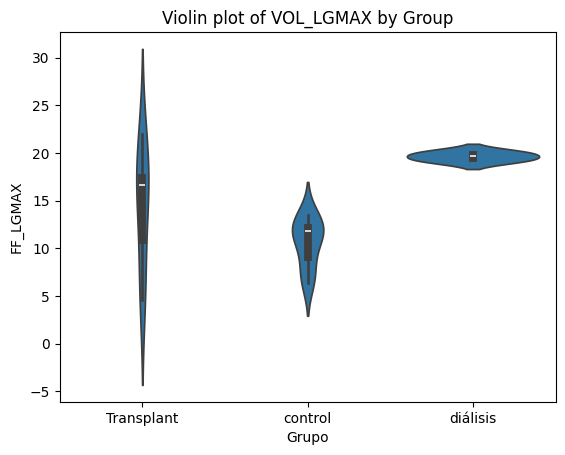

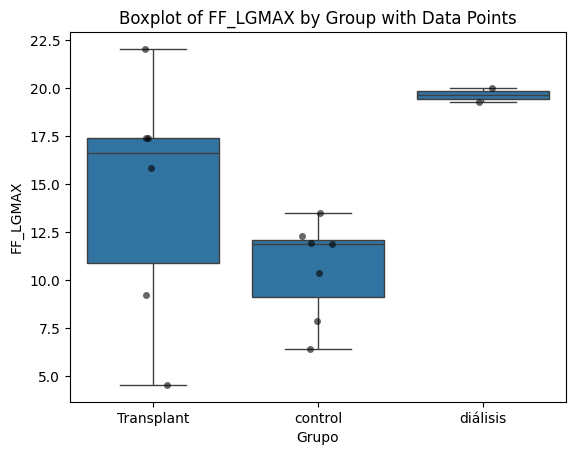

In [24]:
filtered_data = data[data['VOL_LGMAX'].notna()].copy()
filtered_data['Grupo'] = filtered_data['Grupo'].replace({'trasplantado': 'Transplant', 'trasplantada': 'Transplant'})

ff_columns = [col for col in filtered_data.columns if col.startswith('FF_')]
filtered_data[ff_columns] = filtered_data[ff_columns] * 100

vol_columns = [col for col in filtered_data.columns if col.startswith('VOL_')]
filtered_data[vol_columns] = filtered_data[vol_columns] * 1000


sns.violinplot(x='Grupo', y='FF_LGMAX', data=filtered_data)
plt.title('Violin plot of VOL_LGMAX by Group')
plt.show()

sns.boxplot(x='Grupo', y='FF_LGMAX', data=filtered_data, showfliers=False)
sns.stripplot(x='Grupo', y='FF_LGMAX', data=filtered_data, color='black', alpha=0.6, jitter=True)
plt.title('Boxplot of FF_LGMAX by Group with Data Points')
plt.show()

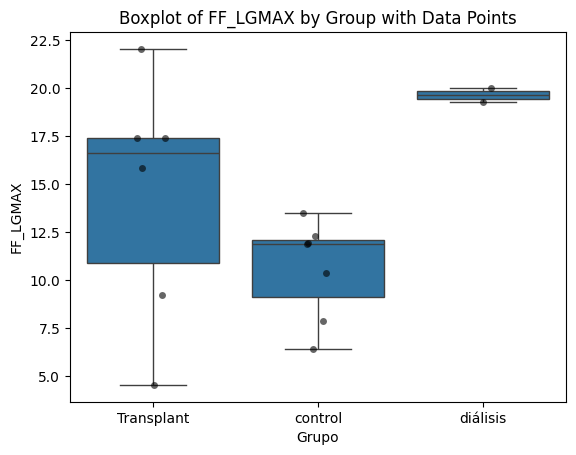

In [25]:
sns.boxplot(x='Grupo', y='FF_LGMAX', data=filtered_data, showfliers=False)
sns.stripplot(x='Grupo', y='FF_LGMAX', data=filtered_data, color='black', alpha=0.6, jitter=True)
plt.title('Boxplot of FF_LGMAX by Group with Data Points')
plt.show()


C:\Users\Martin\AppData\Local\Temp\ipykernel_21252\1976930895.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Grupo', y='FF_LGMAX', data=filtered_data, palette='muted', inner=None)
C:\Users\Martin\AppData\Local\Temp\ipykernel_21252\1976930895.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Grupo', y='FF_LGMAX', data=filtered_data, palette='muted', inner=None)
C:\Users\Martin\AppData\Local\Temp\ipykernel_21252\1976930895.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Grupo', y='FF_LGMAX', data=filtered_data, 

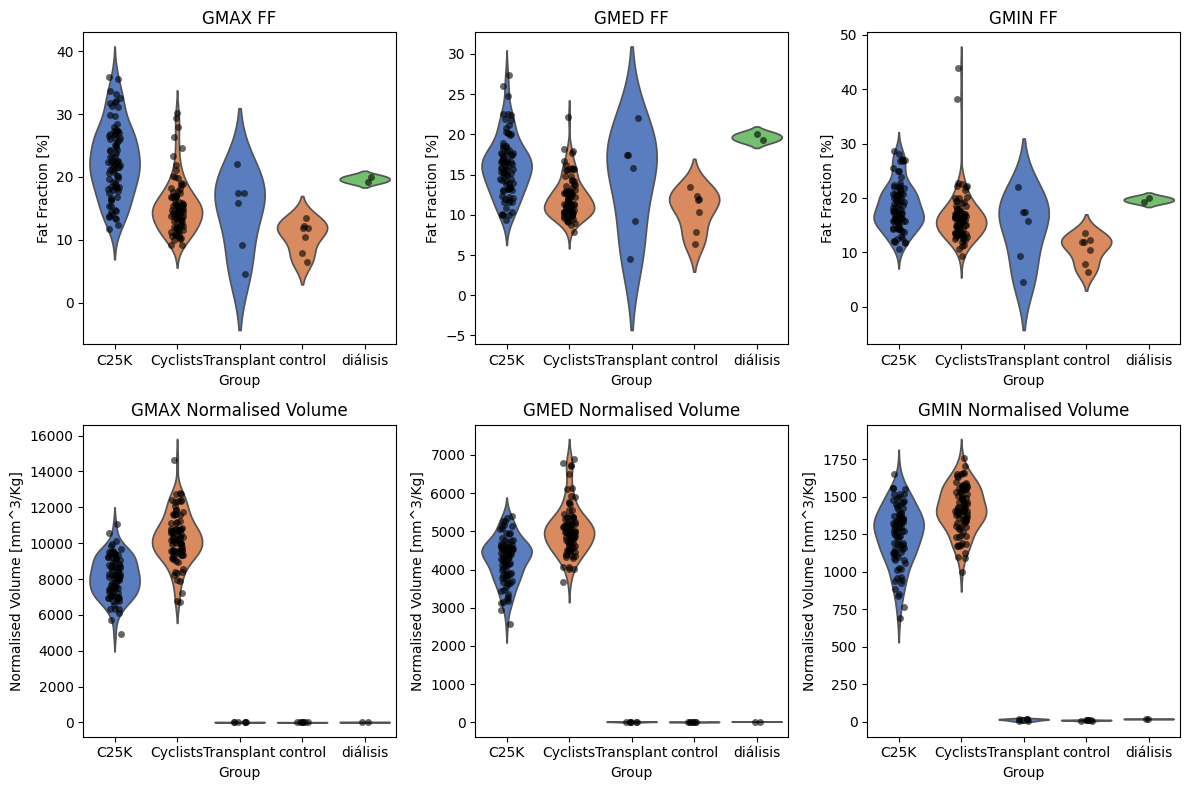

In [26]:
# Now compare to groups from a different study (warning: different protocol)
results_cto5k_filename = "D:/Work/Publications/2025_CoreScore/DataAnalysis/CoreScore/merged_data.csv"
cto5k_pd = pd.read_csv(results_cto5k_filename)
# Variable names:
names_ff_to_merge = [
    'ffMeanSides_1', 'ffMeanSides_2', 'ffMeanSides_3', 'ffMeanSides_4', 'GMAX', 'GMED', 'GMIN']
names_vol_to_merge = [
    'meanVolume_mm3_1', 'meanVolume_mm3_2', 'meanVolume_mm3_3', 'meanVolume_mm3_4', 'GMAX_vol', 'GMED_vol', 'GMIN_vol']
names_nvol_to_merge = [
    'normMeanVolume_mm3_1', 'normMeanVolume_mm3_2', 'normMeanVolume_mm3_3', 'normMeanVolume_mm3_4', 'GMAX_nvol', 'GMED_nvol', 'GMIN_nvol']
names_lvol_to_merge = [
    'meanLeanVolume_mm3_1', 'meanLeanVolume_mm3_2', 'meanLeanVolume_mm3_3', 'meanLeanVolume_mm3_4', 'GMAX_lvol', 'GMED_lvol', 'GMIN_lvol']
names_nlvol_to_merge = [
    'normMeanLeanVolume_mm3_1', 'normMeanLeanVolume_mm3_2', 'normMeanLeanVolume_mm3_3', 'normMeanLeanVolume_mm3_4', 'GMAX_nlvol', 'GMED_nlvol', 'GMIN_nlvol']

# Set up the figure
plt.figure(figsize=(12, 8))
variables_to_plot = ['GMAX', 'GMED', 'GMIN', 'GMAX_nvol', 'GMED_nvol', 'GMIN_nvol']
variables_names_for_titles = {
    'GMAX': 'GMAX FF',
    'GMED':  'GMED FF',
    'GMIN':  'GMIN FF',
    'GMAX_nvol': 'GMAX Normalised Volume',
    'GMED_nvol': 'GMED Normalised Volume',
    'GMIN_nvol': 'GMIN Normalised Volume'
}
ylabel_names = {
    'GMAX': 'Fat Fraction [%]',
    'GMED':  'Fat Fraction [%]',
    'GMIN': 'Fat Fraction [%]',
    'GMAX_nvol': 'Normalised Volume [mm^3/Kg]',
    'GMED_nvol': 'Normalised Volume [mm^3/Kg]',
    'GMIN_nvol': 'Normalised Volume [mm^3/Kg]',
}

# Plot violin plots with individual dots for each variable
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(2, 3, i)  # Create a subplot grid
    sns.violinplot(x='group', y=variable, data=cto5k_pd, palette='muted', inner=None, hue='group', split=False)
    sns.stripplot(x='group', y=variable, data=cto5k_pd, color='black', alpha=0.6, jitter=True)
    sns.violinplot(x='Grupo', y='FF_LGMAX', data=filtered_data, palette='muted', inner=None)
    sns.stripplot(x='Grupo', y='FF_LGMAX', data=filtered_data, color='black', alpha=0.6, jitter=True)
    plt.title(f'{variables_names_for_titles[variable]}')
    plt.xlabel('Group')
    plt.ylabel(f'{ylabel_names[variable]}')

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig(output_path + "violin_plots_core_score_group.png")
plt.show()